# Dan Miller: Exploratory Data Analysis Project
## This Notebook will be used for Project 6 of Data Analytics Fundamentals
## 2/14/2025

## 1. Imports
1. pandas
2. seaborn
3. matplotlib

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib

## 2. Load Data

Loading the Tips dataset using sns.load_dataset().

This dataset is one of the seaborn datasets that are easy to work with and require little hassle to load.

In [182]:
# Load the Tips dataset into pandas DataFrame
tips_df: pd.DataFrame = sns.load_dataset('tips')

# List column names
tips_df.columns

# Inspect first few rows of the DataFrame
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 3. Initial Data Inspection

In [183]:
# Specify the number of rows to display
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [184]:
# Check the shape of the DataFrame
tips_df.shape

(244, 7)

In [185]:
# Display the data types of the columns
tips_df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

This dataset has 7 features in total, 4 of which are categorical while the other 3 are numerical.  In total, there are 244 individual rows, which is a large enough size to create useful statistics from.

## 4. Initial Descriptive Statistics

In [186]:
# Inspect summary statistics for numerical columns
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


From the averages, we see that the average bill at this particular restaurant was about $19.78, and comparing that to the average tip of $2.99, we can see that the data gives us an average tip of about 15%.  

## 5A. Initial Data Distribution for Numerical Columns

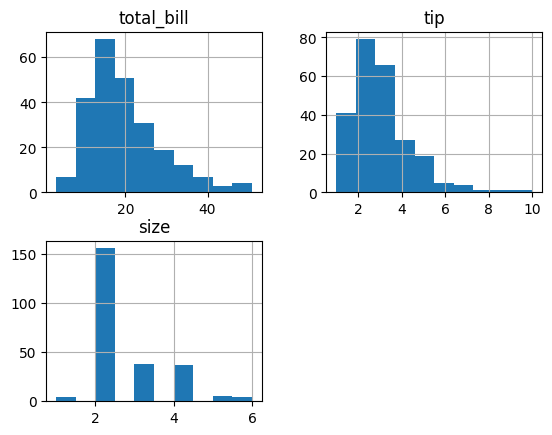

In [187]:
# Inspect hisograms for all numerical columns
tips_df.hist()

# Show all plots
matplotlib.pyplot.show()

Our histograms show us a positive skew relationship.  Although there were some larger parties with larger tips, for the most part our data deals with parties of about 2-4 people with their bill being between roughly $10-$30.

## 5B. Initial Data Distribution for Categorical Columns

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


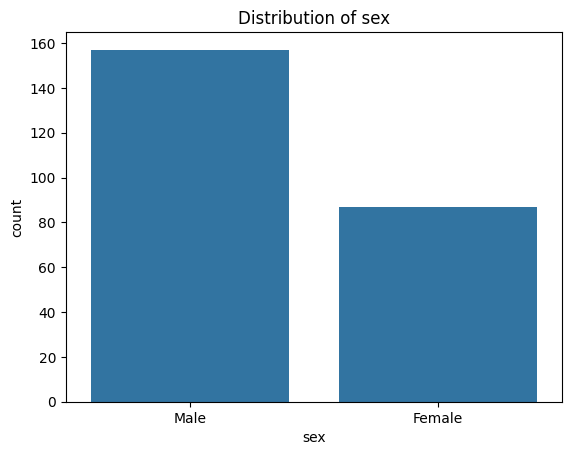

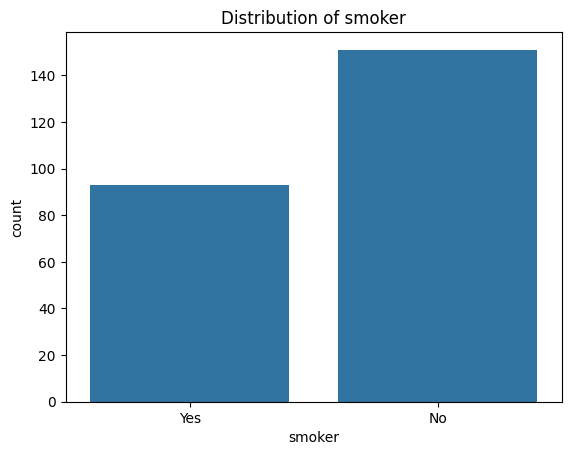

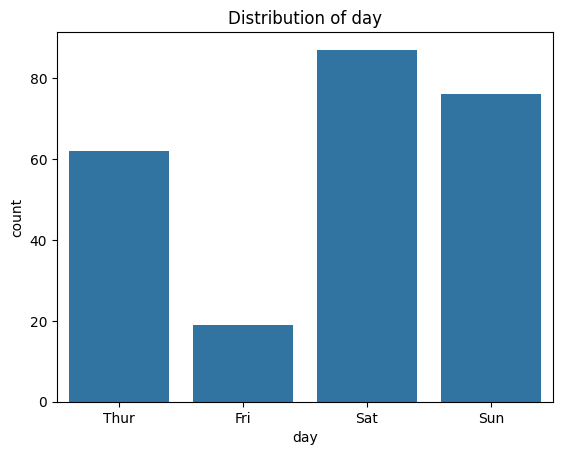

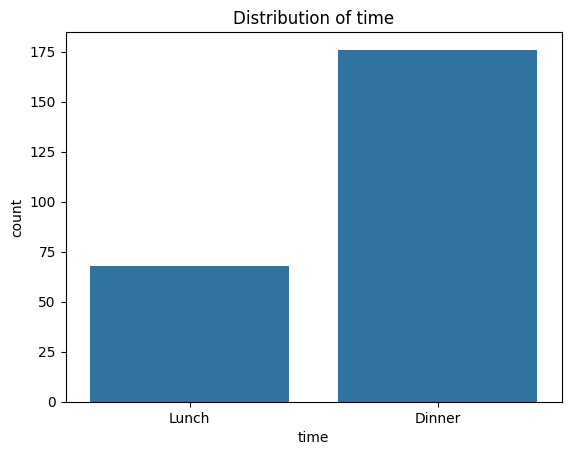

In [188]:
# Show value counts of the 'day' column
print(tips_df['day'].value_counts())


# Inspect value counts
for col in tips_df.select_dtypes(include='category').columns:
    sns.countplot(x=col, data=tips_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

From our distributions we can see that we have about double the amount of male waiters as we do female.  In terms of smokers, about 2/3 don't smoke.  The most popular days are Saturday and Sunday, no surprise there, although the lack of Friday meals is a little concerning comparing how high Thursdays are.  Lastly this seems to be a dinner restaurant with a minority of meals coming from lunchtime.  

## 6. Initial Data Transformation and Feature Engineering

In [189]:
# Renaming Columns
tips_df.rename(columns={'total_bill': 'Total Bill', 'tip': 'Tip',
                        'day': 'Day of Week', 'sex': 'Sex of Server',
                        'size': 'Number of Diners'}, inplace=True)

# Creating a new column
tips_df['Tip Percentage'] = tips_df['Tip'] / tips_df['Total Bill']

To make the data easier to digest, some columns were renamed to be more clear.

Similarily, a column for tip percentage was added to show how much these tips are compared to their respective bills.

## 7. Initial Visualizations

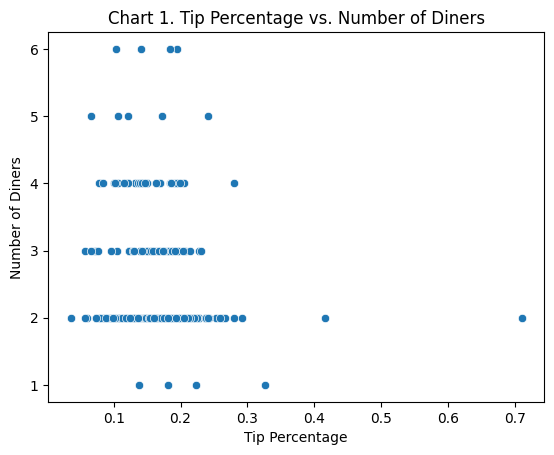

In [190]:
# Create a scatter plot
scatter_plt = sns.scatterplot(x='Tip Percentage', y='Number of Diners', data=tips_df)

# Set the title and labels
scatter_plt.set_title('Chart 1. Tip Percentage vs. Number of Diners')
scatter_plt.set_xlabel('Tip Percentage')
scatter_plt.set_ylabel('Number of Diners')

# Show the plot
matplotlib.pyplot.show()

This chart was created to see if the number of diners had an impact on the tip left.

A scatterplot was used to show each individual scenario.

From the chart it seems that the majority of people, regardless of the size of their party, all tipped around 10-20% of their total bill.  It doesn't seem like party size affected the size of the tip they left respective to their bill.

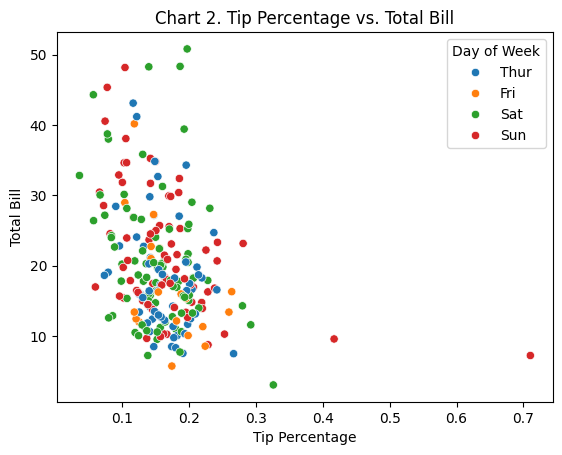

In [191]:
# Create a scatter plot
scatter_plt = sns.scatterplot(x='Tip Percentage', y='Total Bill', hue='Day of Week', data=tips_df)

# Set the title and labels
scatter_plt.set_title('Chart 2. Tip Percentage vs. Total Bill')
scatter_plt.set_xlabel('Tip Percentage')
scatter_plt.set_ylabel('Total Bill')

# Show the plot
matplotlib.pyplot.show()

This chart was created to see how the day of the week changed the tip.

A scatter plot with colorings for each day was created

It seems that the day of the week doesn't change the tip that much.  In the big glob above 0.1-0.2 we have all 4 days.  Our 2 outliers are both Sundays, but only having 2 doesn't count for much.  

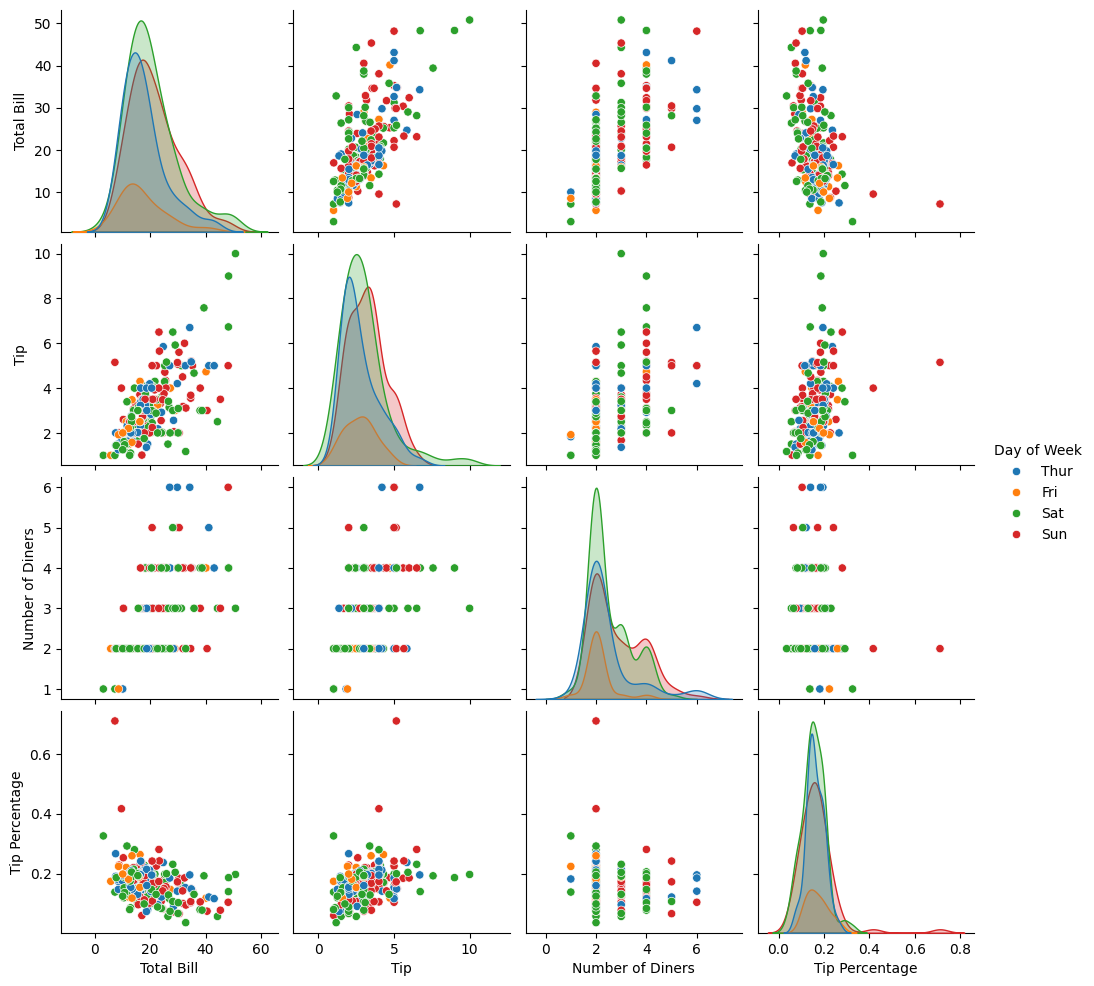

In [ ]:
# Create a pairplot
sns.pairplot(tips_df, hue='Day of Week')

# Show all plots
matplotlib.pyplot.show()

This chart was created to see the overall picture

A pairplot was chosen because it can show all the relationships in a dataset

As seen from the previous charts, there isn't much surprise anywhere.  When comparing the total bill to the tip, we get a positive linear relationship, which makes perfect sense.  The higher the bill, the higher the tip.

Again, the day of the week doesn't seem to have much affect on how people tip.  

Using this data and some machine learning, it is likely that we'll be able to effectively estimate how much a party will tip as we have few outliers and the data is mostly clumped together in these charts.  

## 8. Initial Insights

For this particular dataset, there are few outliers, as nearly ever datapoint follows the same pattern.  Almost all tips were roughly 10-20% of their respective total bill, regardless of party size OR the day of the week.  As noted, this dataset would be useful in terms of machine learning to estimate the tip a party will leave at this particular restaurant, although it would be preferable to have more datapoints than the 244 that we have now, for the sake of accuracy.